# Oscillating Circuit Analysis
## Solving ODE with SCIPY-Function

In [2]:
from math import pi
import numpy as np 
import matplotlib.pyplot as plt
import scipy.integrate as sci

#!! Lösung: rooyen

In [3]:
VOLTAGE_MAX =   2       # V
FREQUENCY   =   1       # Hz
RESISTOR    =   20      # Ohm
COIL        =   9e-3    # H
CAPACITOR   =   1000e-6 # F

TOTALTIME   =   2       # s
TIMESTEP    =   1e-3    # s

time=np.linspace(0, TOTALTIME, int(TOTALTIME/TIMESTEP)+1)

SYSTEM_ARRAY=np.array([[-1/(RESISTOR*CAPACITOR),    -1/CAPACITOR], 
                       [1/COIL,                    0]])
INPUT_ARRAY=np.array([[1/(RESISTOR*CAPACITOR)],
                      [0]])
OUTPUT_ARRAY=np.array([[1,              0],
                        [0,             1],
                        [-1/RESISTOR,    0]])
TRANSIT_ARRAY=np.array([[0],
                        [0],
                        [1/RESISTOR]]) # type: ignore

INITIAL_STATE = np.array([0,0])     # = [outputvoltage, outputcurrent]

In [4]:
def input_voltage(time):
    return VOLTAGE_MAX * np.sin(2 * pi * FREQUENCY * time)

def state_derivative(time, state):
    state=np.reshape(state, (2,1))
    state_derivative = SYSTEM_ARRAY.dot(state) + INPUT_ARRAY * input_voltage(time)
    state_derivative= np.reshape(state_derivative, (1,2))
    return state_derivative

def output_array(state, time):
    return OUTPUT_ARRAY.dot(state) + TRANSIT_ARRAY * input_voltage(time)

In [5]:
ode_solution = sci.solve_ivp(state_derivative, [0, TOTALTIME], INITIAL_STATE, t_eval=time).y

output_array = output_array(ode_solution, time)
output_voltage = output_array[0]
capacitor_current = output_array[1] - output_array[2]
input_current = output_array[2]

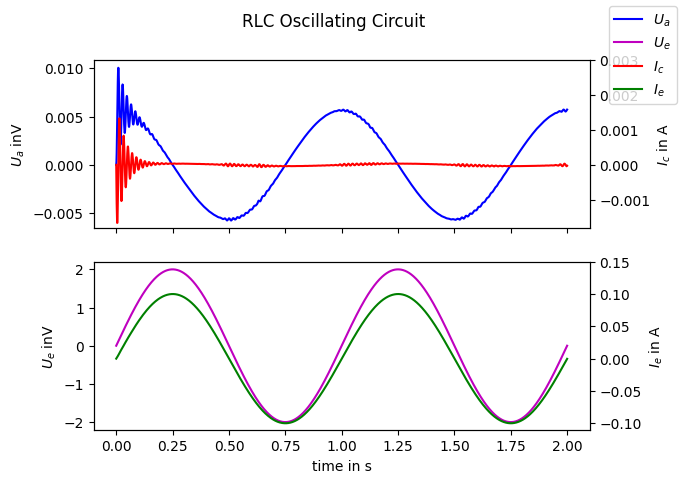

In [7]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("RLC Oscillating Circuit")


ax1.plot(time, output_voltage, label="$U_a$", color="b")
ax1.set_ylabel("$U_a$ in V")
ax12 = ax1.twinx()
ax12.plot(time, capacitor_current, label="$I_c$", color="r")
ax12.set_ylim(top=0.003)
ax12.set_ylabel("$I_c$ in A")


ax2.plot(time, input_voltage(time), label="$U_e$", color ="m")
ax2.set_ylabel("$U_e$ in V")
ax22 = ax2.twinx()
ax22.plot(time, input_current, label="$I_e$", color="g")
ax22.set_ylim(top=0.15)
ax22.set_ylabel("$I_e$ in A")

ax2.set_xlabel("time in s")
fig.legend()

## Explantion:

Das Entfernen von `method='LSODA'` hat keinen Effekt. Die Scipy-Funktion wählt eigenständig eine geeignete Methode aus.

Die Energie wird zwischen Kondensator und Spule periodisch ausgetauscht. Ihr komplexer Widerstand kompensiert sich. Bei ausreichender Kompensation dominiert der ohmsche Verbraucher.